In [139]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image
%matplotlib inline

In [35]:
PTH = '/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/'

In [51]:
D = {}
for f in tqdm(os.listdir(PTH)):
    fn = PTH + f
    x = np.load(fn)
    D[fn] = [np.concatenate(x).sum()]

100%|██████████| 961/961 [00:02<00:00, 354.58it/s]


In [ ]:
D

In [59]:
Ddf = pd.DataFrame.from_dict(D,orient='index',columns=['sum'])

In [62]:
Ddf.head()

,sum
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX9813.npy,113.237137
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4246.npy,10.681933
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4993.npy,11.753131
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4627.npy,76.495880
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4151.npy,70.366226


In [73]:
D_sorted = Ddf.sort_values(by=['sum'],ascending=False)

In [80]:
D_sorted['sum'].median()

58.48186111450195

In [89]:
D_sorted.loc[abs(D_sorted['sum'] - D_sorted['sum'].mean()) < 500]

,sum
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5765.npy,2011.744385
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5749.npy,2001.663208
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5262.npy,1902.500244
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5265.npy,1888.469482
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5748.npy,1887.414429
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5773.npy,1868.997070
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5263.npy,1848.819824
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5766.npy,1702.116577
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5259.npy,1642.082275
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5735.npy,1576.044434


---

1


(720, 1024)

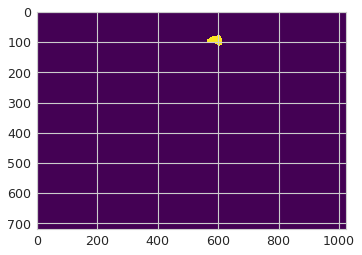

In [274]:
# load npy array
x = np.load('/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5259.npy')
# get its threshold
x_th = x > 0.5
# convert to OpenCV usable type
x_img = x_th.astype('uint8')

# perform simple connected components
num_labels, labels_im = cv2.connectedComponents(x_img)

# plot
plt.imshow(labels_im)
print(num_labels - 1)
labels_im.shape
